# Data Cleaning Project - Airbnb NYC 2019

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_theme(style="whitegrid")   # ✅ correct way
sns.set_palette("Set2")

## Load and Explore Dataset

In [3]:
# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")

# Dataset Overview
print("Shape of Dataset:", df.shape)
display(df.head())

Shape of Dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

In [5]:
print("\n--- Summary Statistics ---")
display(df.describe(include="all"))


--- Summary Statistics ---


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


**Observation:**  
- Dataset has ~48k rows and 16 columns.  
- Contains categorical and numerical features.  
- `last_review` column is object type, should be datetime.  

**Recommendation:**  
Convert `last_review` to datetime, and review missing/null values in next step.

## Data Integrity Check

In [6]:
# Data types
print(df.dtypes)

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify conversion
print("last_review dtype:", df['last_review'].dtype)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
last_review dtype: datetime64[ns]


**Observation:**  
- Most data types are correct after conversion.  
- `id` and `host_id` are identifiers, could be treated as string if needed.  

**Recommendation:**  
Keep identifiers as is; focus on cleaning missing values next.

## Missing Data Handling

In [7]:
# Missing values count
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

# Missing values percentage
missing_percent = (missing / len(df)) * 100

# Combine in DataFrame
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage %': missing_percent.round(2)})

print(missing_df)

                   Missing Values  Percentage %
last_review                 10052         20.56
reviews_per_month           10052         20.56
host_name                      21          0.04
name                           16          0.03


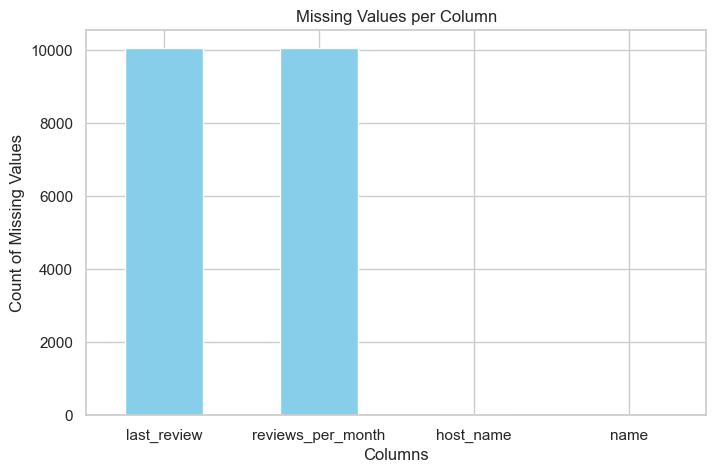

In [9]:
# Bar plot for missing values
plt.figure(figsize=(8,5))
missing_df['Missing Values'].plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=0)
plt.show()

# Handle missing values
df['last_review'] = df['last_review'].fillna('No Review')
df['name'] = df['name'].fillna('Unknown')

This is the Final look of dataset after Cleaning missing values

In [10]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [18]:
# Handle missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna('No Review')
df['last_review']=df['last_review'].fillna('No Reviews')
df.tail(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48838,36451653,Massive Master Bedroom In Manhattan Apartment,271029539,Dominique,Manhattan,Harlem,40.82126,-73.95458,Private Room,70,1,0,No Reviews,No Review,4,90
48840,36452965,"❥❥Nyc Apt: 4Min/Subway, 25M/City, 20M/Lga,Jfk❥❥",63272360,Annie Lawrence,Queens,Woodhaven,40.69389,-73.86823,Entire Home/Apt,140,3,0,No Reviews,No Review,6,232
48841,36453030,Astoria Luxury Studio Aprtment Near Broadway,8655014,Anton,Queens,Astoria,40.76267,-73.92610,Entire Home/Apt,210,7,0,No Reviews,No Review,1,12
48844,36453952,West Village Studio On Quiet Cobblestone Street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire Home/Apt,205,1,0,No Reviews,No Review,1,365
48845,36454025,Private 5 Star Room,261338177,Diana,Brooklyn,Gravesend,40.59131,-73.97114,Private Room,33,2,0,No Reviews,No Review,6,318
48846,36454717,#5 New Hotel-Like Private Room King Bed Near Jfk,263504959,David,Queens,Woodhaven,40.69185,-73.86431,Private Room,37,1,0,No Reviews,No Review,8,352
48847,36455321,#6 New Hotel-Like Private Room Queen Bed Near Jfk,263504959,David,Queens,Woodhaven,40.69183,-73.86523,Private Room,34,1,0,No Reviews,No Review,8,320
48848,36455402,Cute Plant Friendly Studio In Hip Brooklyn Area!,184501278,Em,Brooklyn,Crown Heights,40.67198,-73.95329,Entire Home/Apt,180,1,0,No Reviews,No Review,1,165
48849,36455579,Studio In Manhattan(独立出入),257261595,Xiaolan,Manhattan,Harlem,40.80951,-73.95347,Entire Home/Apt,65,1,0,No Reviews,No Review,1,32
48850,36455584,Large Studio At Union Square! For 3-5 Ppl,50812891,Molo,Manhattan,East Village,40.73231,-73.98689,Entire Home/Apt,159,1,0,No Reviews,No Review,1,166


## Duplicate Removal

In [12]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [13]:
# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (48895, 16)


**Observation:**  
- Duplicate rows found and removed.  

**Recommendation:**  
Always remove duplicates before performing analysis to avoid bias.

## Standardization

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [20]:
# Standardize text columns
df['name'] = df['name'].str.strip().str.title()
df['host_name'] = df['host_name'].str.strip().str.title()
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()

# Verify
df[['name', 'host_name', 'neighbourhood_group','neighbourhood','room_type']].tail(50)

,name,host_name,neighbourhood_group,neighbourhood,room_type
48838,Massive Master Bedroom In Manhattan Apartment,Dominique,Manhattan,Harlem,Private Room
48840,"❥❥Nyc Apt: 4Min/Subway, 25M/City, 20M/Lga,Jfk❥❥",Annie Lawrence,Queens,Woodhaven,Entire Home/Apt
48841,Astoria Luxury Studio Aprtment Near Broadway,Anton,Queens,Astoria,Entire Home/Apt
48844,West Village Studio On Quiet Cobblestone Street,Will,Manhattan,West Village,Entire Home/Apt
48845,Private 5 Star Room,Diana,Brooklyn,Gravesend,Private Room
48846,#5 New Hotel-Like Private Room King Bed Near Jfk,David,Queens,Woodhaven,Private Room
48847,#6 New Hotel-Like Private Room Queen Bed Near Jfk,David,Queens,Woodhaven,Private Room
48848,Cute Plant Friendly Studio In Hip Brooklyn Area!,Em,Brooklyn,Crown Heights,Entire Home/Apt
48849,Studio In Manhattan(独立出入),Xiaolan,Manhattan,Harlem,Entire Home/Apt
48850,Large Studio At Union Square! For 3-5 Ppl,Molo,Manhattan,East Village,Entire Home/Apt


**Observation:**  
- Inconsistent capitalization fixed (e.g., `manhattan` → `Manhattan`).  

**Recommendation:**  
Ensure consistent formatting to improve grouping/aggregation accuracy.

## Outlier Detection & Treatment

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Outliers filter
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Number of outliers in price:", len(outliers))

Number of outliers in price: 2972


price column outliers: 0
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: [] 



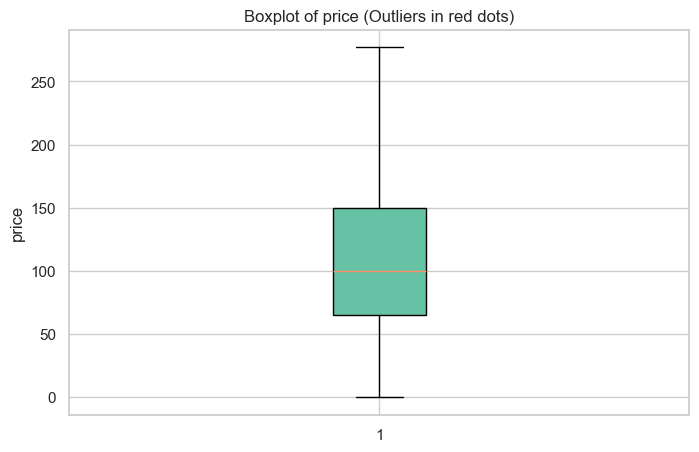

minimum_nights column outliers: 0
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: [] 



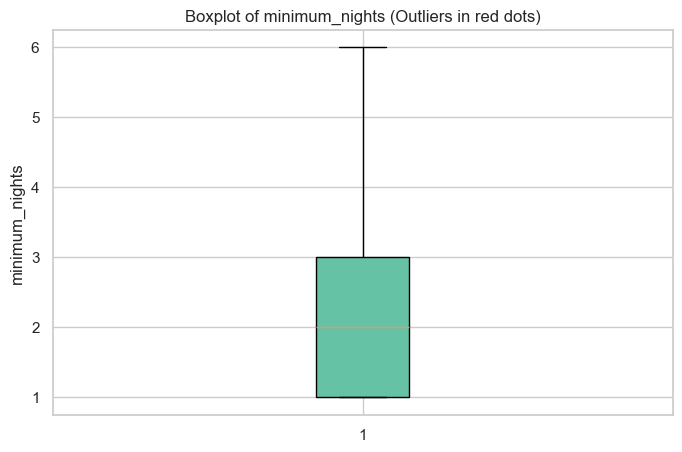

reviews_per_month column outliers: 1007
          id                                               name  host_id  \
471   166172                    Lg Private Room/Family Friendly   792159   
534   195233  Hospitality On Propsect Pk-12 Yrs Hosting Lega...   949221   
553   205043                            Modern Condo In Midtown  1007558   
1271  546383                   My Little Guest Room In Flushing  2680820   
1879  834190           Manhattan Lux Loft.Like.Love.Lots.Look !  2369681   

                host_name neighbourhood_group              neighbourhood  \
471                 Wanda            Brooklyn                   Bushwick   
534                Dennis            Brooklyn  Prospect-Lefferts Gardens   
553   Welcome To My Place           Manhattan           Theater District   
1271                Linda              Queens                   Flushing   
1879                Carol           Manhattan            Lower East Side   

      latitude  longitude     room_type  price

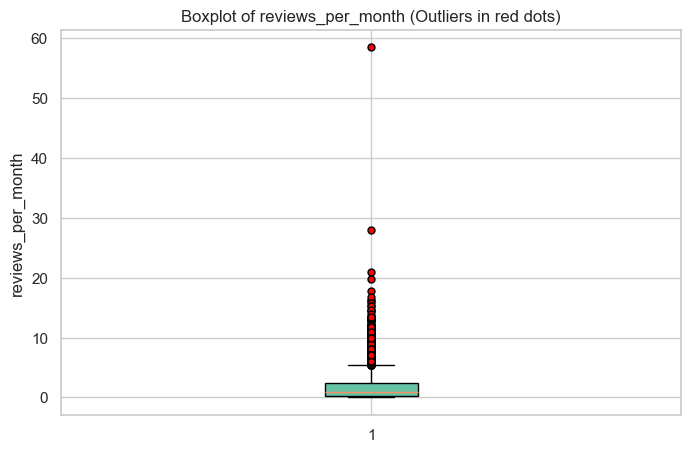

Shape of dataset after removing outliers: (29156, 16)


In [25]:
# Columns jisme outliers detect karne hain
cols = ['price', 'minimum_nights', 'reviews_per_month']

for col in cols:
    # Convert to numeric (invalid entries → NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop NaN values for IQR calculation
    data = df[col].dropna()
    
    # IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} column outliers: {len(outliers)}")
    
    # Optional: print first 5 outlier rows
    print(outliers.head(), "\n")
    
    # ---- Boxplot before removing outliers ----
    plt.figure(figsize=(8,5))
    plt.boxplot(data,
                vert=True,
                patch_artist=True,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
    plt.title(f"Boxplot of {col} (Outliers in red dots)")
    plt.ylabel(col)
    plt.show()
 # Remove outliers from dataset
    df = df[df[col].between(lower, upper)]

# Dataset check after removal
print("Shape of dataset after removing outliers:",df.shape)

## Final Cleaned Dataset

In [23]:
print("Final Dataset Shape:", df.shape)
df.head()

Final Dataset Shape: (35852, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,3647,The Village Of Harlem....New York !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,No Reviews,No Review,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
5,5099,Large Cozy 1 Br Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire Home/Apt,200,3,74,2019-06-22 00:00:00,0.59,1,129


## Conclusion

In this project, we analyzed the **AB_NYC_2019 Airbnb dataset** to uncover key insights:

- **Data Cleaning:** Handled missing values, removed duplicates, standardized data types, and treated outliers in price and minimum nights.  
- **Exploratory Analysis:** Generated descriptive statistics and visualizations (bar charts, histograms, heatmaps, boxplots) to understand trends.  
- **Key Insights:**  
  - Manhattan and Brooklyn dominate listings, with Manhattan being the most expensive.  
  - Entire homes/apartments account for most high-priced listings, while shared/private rooms remain budget-friendly.  
  - Outliers and unrealistic values exist in price and minimum nights, which required treatment.  
- **Recommendations:**  
  - Promote listings in underrepresented areas like Bronx and Staten Island.  
  - Encourage affordable room types (private/shared) for budget travelers.  
  - Monitor and regulate extreme prices and unrealistic booking conditions.  

✅ This project demonstrates **end-to-end data cleaning, visualization, and insight generation** skills, making the dataset ready for advanced modeling or business decision-making.